In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [5]:
df.duplicated().sum()

0

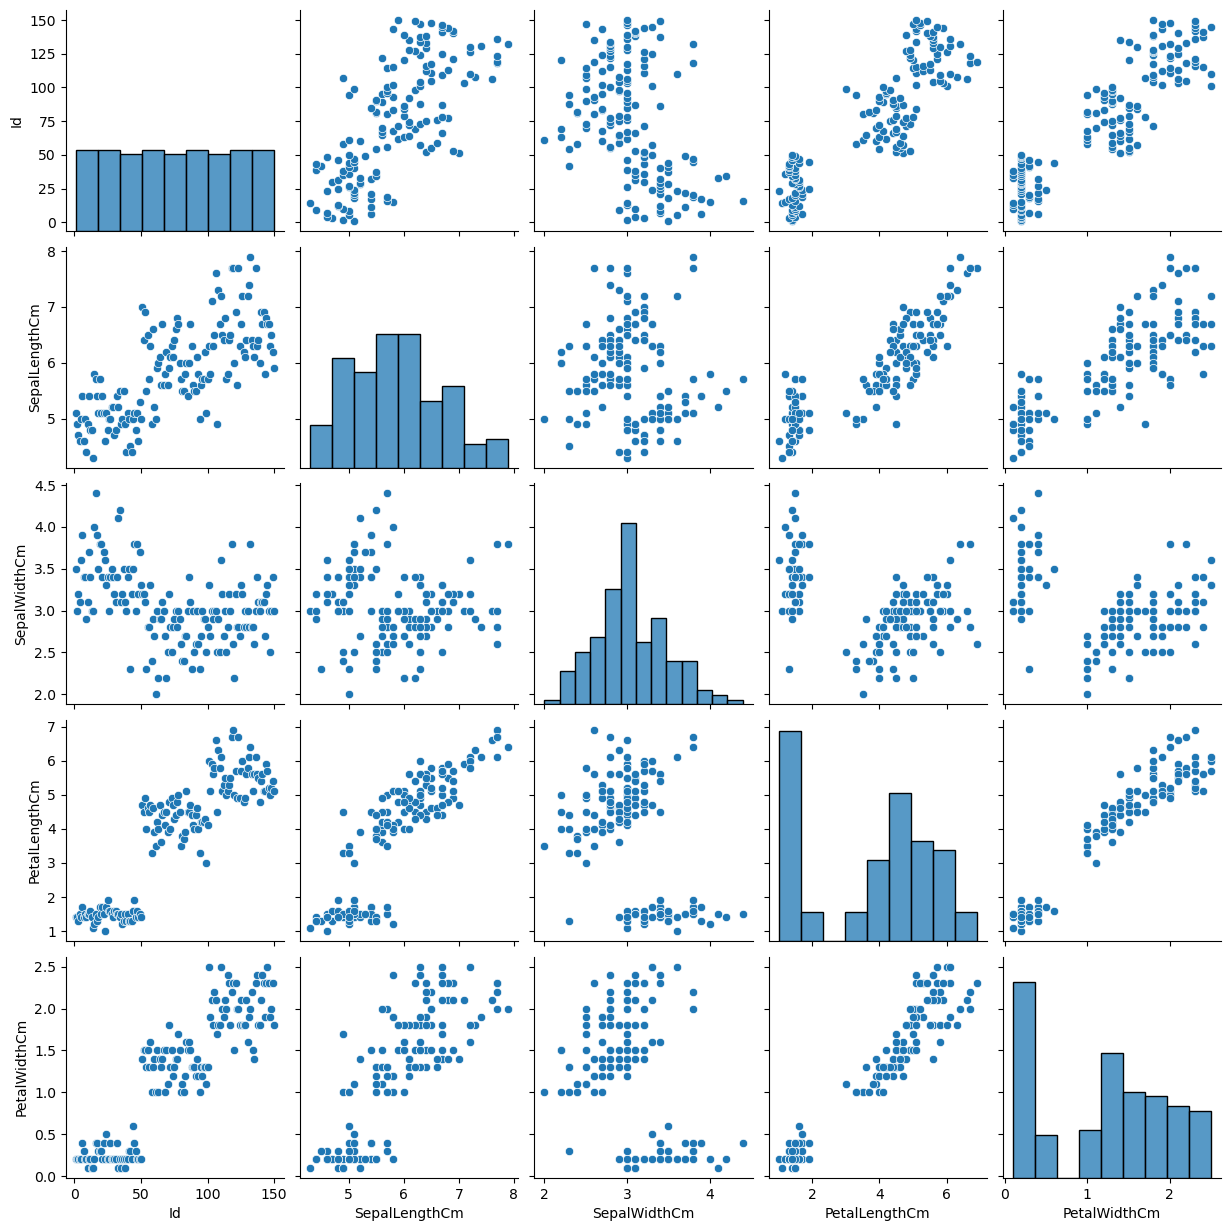

In [6]:
sns.pairplot(df)

In [7]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x186591dafa0>,
 'caps': [<matplotlib.lines.Line2D at 0x18658bc9580>,
 'boxes': [<matplotlib.lines.Line2D at 0x186591dacd0>],
 'medians': [<matplotlib.lines.Line2D at 0x18658bc9b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x18658bc9e20>],
 'means': []}

In [8]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18658bdc7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18658bdcd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x18658bdc4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18658be6340>],
 'fliers': [<matplotlib.lines.Line2D at 0x18658be6610>],
 'means': []}

In [9]:
plt.boxplot(df['PetalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18658be6f70>,
 'caps': [<matplotlib.lines.Line2D at 0x18658bf43d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18658be6d60>],
 'medians': [<matplotlib.lines.Line2D at 0x18658bf47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18658bf4ac0>],
 'means': []}

In [10]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18658c00340>,
 'caps': [<matplotlib.lines.Line2D at 0x18658c00880>,
 'boxes': [<matplotlib.lines.Line2D at 0x18658c00070>],
 'medians': [<matplotlib.lines.Line2D at 0x18658c00e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x18658c0e130>],
 'means': []}

In [11]:
df.drop('Id',axis=1,inplace=True)

In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [14]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [16]:
x.shape

(150, 4)

In [17]:
y=df['Species']

In [18]:
y.shape

(150,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()

In [24]:
x_train=ss.fit_transform(x_train)

In [25]:
x_test=ss.fit_transform(x_test)

In [26]:
from sklearn.svm import SVC

In [27]:
svc=SVC()

In [28]:
svc.fit(x_train,y_train)

SVC()

In [29]:
y_pred=svc.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier()

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn=knn.predict()

TypeError: predict() missing 1 required positional argument: 'X'